In [2]:
import pandas as pd

# Load datasets into pandas DataFrames
standardized_df = pd.read_csv('standardized.csv')
credits_df = pd.read_csv('credits.csv')

# Display the first few rows of each dataset
standardized_df.head(), credits_df.head()

(         id                            title   type  \
 0   tm84618                      Taxi Driver  MOVIE   
 1  tm154986                      Deliverance  MOVIE   
 2  tm127384  Monty Python and the Holy Grail  MOVIE   
 3  tm120801                  The Dirty Dozen  MOVIE   
 4   tm70993                    Life of Brian  MOVIE   
 
                                          description  release_year  \
 0  A mentally unstable Vietnam War veteran works ...          1976   
 1  Intent on seeing the Cahulawassee River before...          1972   
 2  King Arthur, accompanied by his squire, recrui...          1975   
 3  12 American military prisoners in World War II...          1967   
 4  Brian Cohen is an average young Jewish man, bu...          1979   
 
   age_certification  runtime                                       genres  \
 0                 R      114                           ['drama', 'crime']   
 1                 R      109  ['drama', 'action', 'thriller', 'european']   


In [3]:
# Check for missing values in both datasets
missing_standardized = standardized_df.isnull().sum()
missing_credits = credits_df.isnull().sum()

missing_standardized, missing_credits

(id                                0
 title                             1
 type                              0
 description                       9
 release_year                      0
 age_certification              2364
 runtime                           0
 genres                            0
 production_countries              0
 seasons                        3744
 imdb_id                         262
 imdb_score                      315
 imdb_votes                        0
 tmdb_popularity                   0
 tmdb_score                      195
 nor_imdb_vote                     0
 nor_tmdb_popularity               0
 weighted_average_popularity       0
 dtype: int64,
 person_id       0
 id              0
 name            0
 character    9772
 role            0
 dtype: int64)

In [4]:
# Data Cleaning

# Drop rows with missing values in essential columns
standardized_df.dropna(subset=['title', 'description', 'imdb_id'], inplace=True)

# Fill missing values
standardized_df['age_certification'].fillna('Unknown', inplace=True)
standardized_df['seasons'].fillna(0, inplace=True)
standardized_df['imdb_score'].fillna(standardized_df['imdb_score'].median(), inplace=True)
standardized_df['tmdb_score'].fillna(standardized_df['tmdb_score'].median(), inplace=True)

credits_df['character'].fillna('Unknown', inplace=True)

# Check if all missing values have been addressed
missing_standardized_cleaned = standardized_df.isnull().sum()
missing_credits_cleaned = credits_df.isnull().sum()

missing_standardized_cleaned, missing_credits_cleaned

(id                             0
 title                          0
 type                           0
 description                    0
 release_year                   0
 age_certification              0
 runtime                        0
 genres                         0
 production_countries           0
 seasons                        0
 imdb_id                        0
 imdb_score                     0
 imdb_votes                     0
 tmdb_popularity                0
 tmdb_score                     0
 nor_imdb_vote                  0
 nor_tmdb_popularity            0
 weighted_average_popularity    0
 dtype: int64,
 person_id    0
 id           0
 name         0
 character    0
 role         0
 dtype: int64)

In [5]:
# Merge the datasets based on the 'id' column
merged_df = pd.merge(standardized_df, credits_df[credits_df['role'] == 'ACTOR'], on='id', how='inner')

# Display the first few rows of the merged dataset
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,nor_imdb_vote,nor_tmdb_popularity,weighted_average_popularity,person_id,name,character,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,808582.0,40.965,8.179,0.92,0.68,0.8,3748,Robert De Niro,Travis Bickle,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,808582.0,40.965,8.179,0.92,0.68,0.8,14658,Jodie Foster,Iris Steensma,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,808582.0,40.965,8.179,0.92,0.68,0.8,7064,Albert Brooks,Tom,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,808582.0,40.965,8.179,0.92,0.68,0.8,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,...,808582.0,40.965,8.179,0.92,0.68,0.8,48933,Cybill Shepherd,Betsy,ACTOR


In [6]:
# 1. Identify the movies with high popularity scores
# We can use the 75th percentile as a threshold for high popularity
threshold_popularity = merged_df['weighted_average_popularity'].quantile(0.75)
popular_movies = merged_df[merged_df['weighted_average_popularity'] > threshold_popularity]

# 2. Count the number of appearances of each actor in these popular movies
actor_counts = popular_movies['name'].value_counts()

# 3. Label actors as "popular" based on a threshold
# We can use the 75th percentile of the actor_counts as a threshold for popular actors
threshold_actor = actor_counts.quantile(0.75)
popular_actors = actor_counts[actor_counts > threshold_actor].index.tolist()

# 4. Add a new column to the merged dataset indicating whether the movie has a popular actor or not
merged_df['has_popular_actor'] = merged_df['name'].isin(popular_actors).astype(int)
print(merged_df)
# Analyze the distribution of movie popularity scores for movies with and without popular actors
average_popularity_with_popular_actors = merged_df.groupby('has_popular_actor')['weighted_average_popularity'].mean()

average_popularity_with_popular_actors

              id        title   type  \
0        tm84618  Taxi Driver  MOVIE   
1        tm84618  Taxi Driver  MOVIE   
2        tm84618  Taxi Driver  MOVIE   
3        tm84618  Taxi Driver  MOVIE   
4        tm84618  Taxi Driver  MOVIE   
...          ...          ...    ...   
56995  tm1059008      Lokillo  MOVIE   
56996  tm1059008      Lokillo  MOVIE   
56997  tm1059008      Lokillo  MOVIE   
56998  tm1059008      Lokillo  MOVIE   
56999  tm1059008      Lokillo  MOVIE   

                                             description  release_year  \
0      A mentally unstable Vietnam War veteran works ...          1976   
1      A mentally unstable Vietnam War veteran works ...          1976   
2      A mentally unstable Vietnam War veteran works ...          1976   
3      A mentally unstable Vietnam War veteran works ...          1976   
4      A mentally unstable Vietnam War veteran works ...          1976   
...                                                  ...           ...   
5

has_popular_actor
0    0.569615
1    0.691380
Name: weighted_average_popularity, dtype: float64

C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

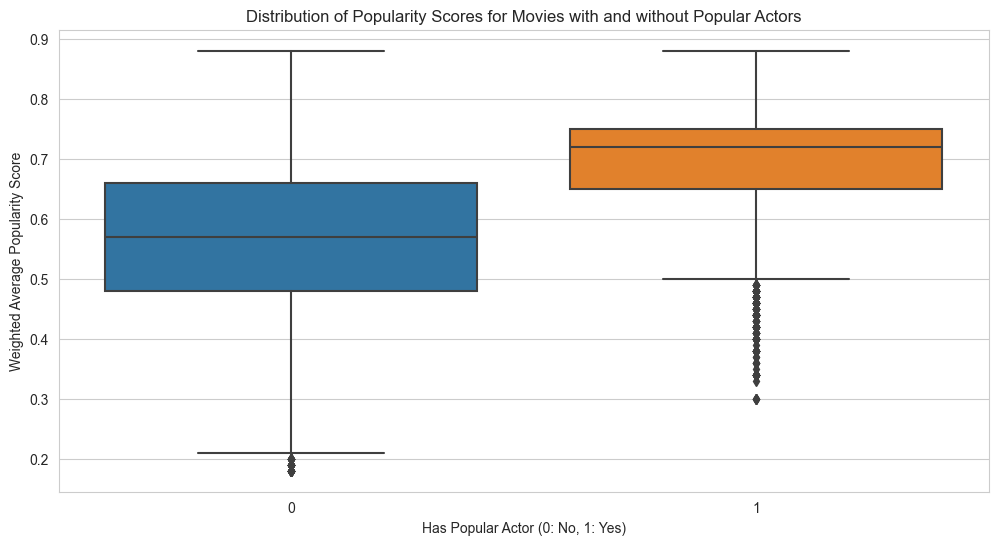

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style("whitegrid")

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='has_popular_actor', y='weighted_average_popularity', data=merged_df)
plt.title('Distribution of Popularity Scores for Movies with and without Popular Actors')
plt.xlabel('Has Popular Actor (0: No, 1: Yes)')
plt.ylabel('Weighted Average Popularity Score')
plt.show()